In [19]:
%matplotlib notebook

from numpy import *
from os import path
home = path.expanduser("~")
from matplotlib import animation
import matplotlib.pyplot as plt
working_path = '/Users/chunshen/Desktop/JETSCAPE/JETSCAPE-public/build'

In [9]:
# data preparation
data = fromfile(path.join(working_path, "evolution_for_movie_xyeta.dat"), dtype=float32)
data = data.reshape(-1, 14)
tau_list = unique(data[:, 0])
ntau = len(tau_list)
neta = 1
nx   = 101
ny   = 101
eta_size = 1.
x_size   = 20.0
y_size   = 20.0
dx   = x_size/(nx - 1)
dy   = y_size/(ny - 1)
deta = eta_size/neta
ed = zeros([ntau, neta, nx, ny])
for itau, tau_local in enumerate(tau_list):
    idx = (data[:, 0] == tau_local)
    data_cut = data[idx, :]
    for igrid in range(len(data_cut[:, 0])):
        x_idx   = int((data_cut[igrid, 1] + x_size/2.)/dx)
        y_idx   = int((data_cut[igrid, 2] + y_size/2.)/dy)
        eta_idx = int((data_cut[igrid, 3] + eta_size/2.)/deta)
        ed[itau, eta_idx, x_idx, y_idx]   = data_cut[igrid, 5]
print("Read in data completed.")
print("tau_min = {0:.3f}, tau_max = {1:.3f}, ntau = {2:d}".format(
                                            tau_list[0], tau_list[1], ntau))

Read in data completed.
tau_min = 0.600, tau_max = 0.640, ntau = 268


## Generate a movie

<IPython.core.display.Javascript object>


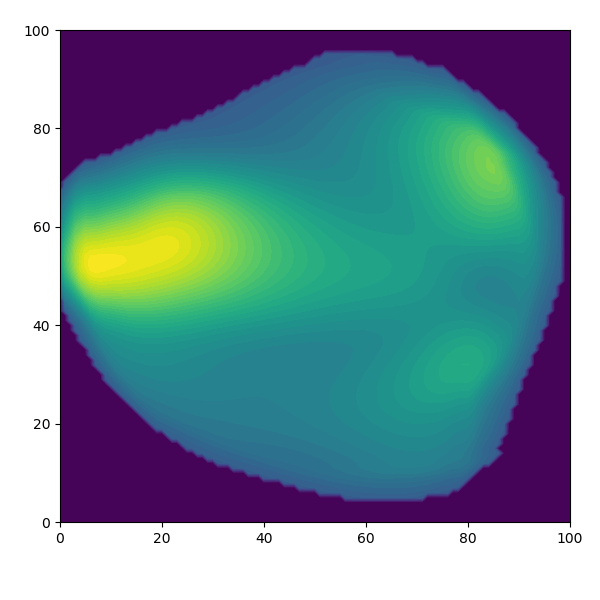

In [26]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes([0.1, 0.13, 0.85, 0.82])
cont = plt.contourf(ed[0, 0, :, :].transpose(), 50)

# animation function
def animate(i): 
    global cont
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(ed[i, 0, :, :].transpose(), 50)
    return cont  
anim = animation.FuncAnimation(fig, animate, frames=ntau, repeat=False)
#anim.save('animation.mp4', fps=24)